# Анализ для магазина "Стримчик"

В данной работе анализируются открытые источники данных о продаже игр. В эти источники входят:
- название игры
- платформа
- год релиза
- жанр игры
- продажи по разным регионам
- оценки критиков и пользователей
- возрастной рейтинг

Необходимо обработать данные для дальнейшего прогназирования кампаний. Ставятся следующие цели:
- изучить базу данных
- произвести предварительную обработку данных (названия столбцов, обработать пропуски и дубликаты)
- вывести суммарные продажи по каждой игре
- оценить выпуск игр по годам
- оценить время жизни платформ
- оценить современные тенденции рынка, какие платформы могут быть выгодны, какие убыточны
- оценить влияние оценок критиков и пользователей на продажи игры
- узнать наиболее прибыльные жанры
- детально изучить рынок каждого крупного региона
- проверить следующие гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import sqrt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# посмотрим количество пропусков по столбцам
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Видно, что названия колонок с большой буквы, надо к змеиному виду привести.

Есть 2 пропуска в Name и Genre, 269 в Year_of_Release, много пропусков в оценивании работы

## Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру)

In [5]:
data.columns = map(str.lower, data.columns)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Названия столбцов приведены к нужному регистру

### Преобразуйте данные в нужные типы. 
Опишите, в каких столбцах заменили тип данных и почему;

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


Изменил тип данных в годе релиза и оценке критиков, т.к. там целочисленные значения

В столбце оценок пользователей предварительно надо обработать строки

### Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# проверка на явные дубликаты
print(len(data))
data.drop_duplicates()
print(len(data))

16715
16715


In [9]:
# выведем дубликаты по названию, платформе и году релиза
dupl = data[data[['name', 'platform', 'year_of_release']].duplicated()]
dupl

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,<NA>,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83,5.5,E


In [10]:
# удалим неявные дубликаты
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [11]:
# удалим строки с пустыми именами и годами, без знания годов релиза не получится анализировать данные
data = data.dropna(subset = ['name']).reset_index(drop = True)
data = data.dropna(subset = ['year_of_release']).reset_index(drop = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Обработать колонки с оценками не получится, слишком много пропущенных значений и игры все имеют разные оценки

In [12]:
data_tbd = data[data['user_score'] == 'tbd']
data_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,<NA>,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16423,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16425,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16426,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16432,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


Аббревиатура <b>tbd</b> используется для обозначений не сформировавшихся оценок по причине того, что продукт либо скоро поменяется (выйдет крупное дополнение), либо выйдет на рынок и пользователи еще не поиграли в эту игру.

Для дальнейшего анализа заменим эти значения на <b>NaN</b>

In [13]:
data = data.replace('tbd', np.nan)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [14]:
# приведем к типу float
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [15]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


<font size=5>Итого:</font>
- названия столбцов были приведены к правильному виду
- изменены типы столбцов critic_score, user_score, year_of_release
- проверены наличия явных дубликатов
- подсчитаны суммарные доходы
- удалены строки с отсутствующим название игры и годом релиза

## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [16]:
data_years_count = data.pivot_table(index='year_of_release', values='all_sales', aggfunc='count')
data_years_count

,all_sales
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Количество игр')

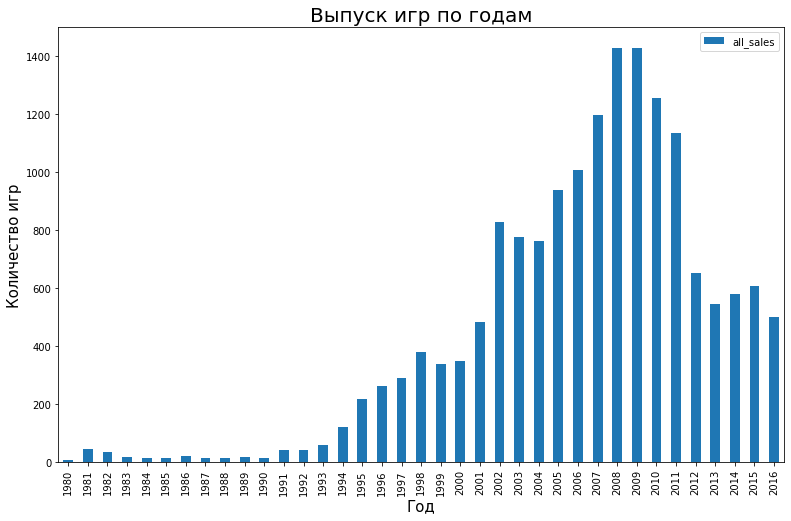

In [17]:
ax = data_years_count.plot.bar(figsize=(13,8))
ax.set_title('Выпуск игр по годам', fontsize=20)
ax.set_xlabel('Год', fontsize=15)
ax.set_ylabel('Количество игр', fontsize=15);

In [18]:
# Таблица с продажами игр по годам
data_years_sum = data.pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
data_years_sum

,all_sales
year_of_release,
1980,11.38
1981,35.68
1982,28.88
1983,16.80
1984,50.35
1985,53.95
1986,37.08
1987,21.70
1988,47.21


Text(0, 0.5, 'Общий доход')

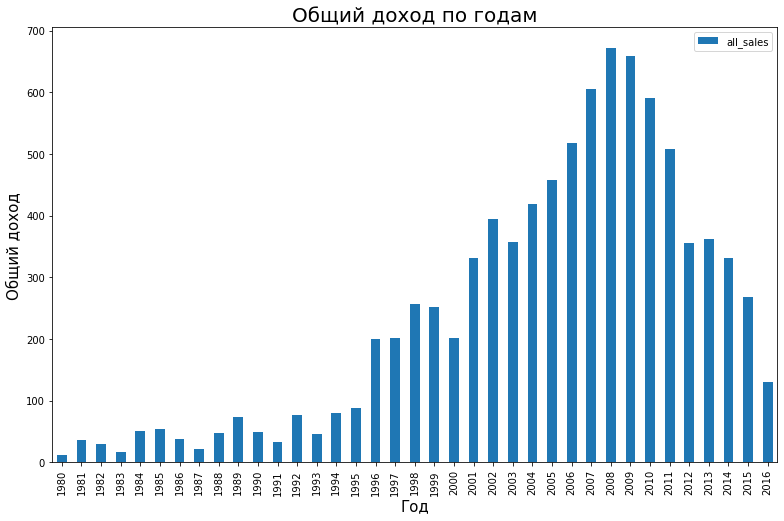

In [19]:
# доход по годам
ax = data_years_sum.plot.bar(figsize=(13,8))
ax.set_title('Общий доход по годам', fontsize=20)
ax.set_xlabel('Год', fontsize=15)
ax.set_ylabel('Общий доход', fontsize=15)

Видно, что бум разработки игр начался в 1994 году, когда количество игр превысило 100 штук. Пик разработки пришелся на 2008 -2009 года, последние годы начался резкий спад производства игр.
Данные важны за каждый год, например в 1985 году была выпущена одна из самых популярных игр Марио. Однако если прогнозировать дальнейшее поведение рынка, то стоит смотреть с 2013 года (выход новых поколений самых популярных приставок)

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Создадим сводную таблицу с годом старта продаж игр на платформу и последним годом

In [20]:
data_live = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
data_live.columns = ['start', 'end']
data_live['duration'] = data_live['end'] - data_live['start']
data_live

,start,end,duration
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: duration, dtype: float64

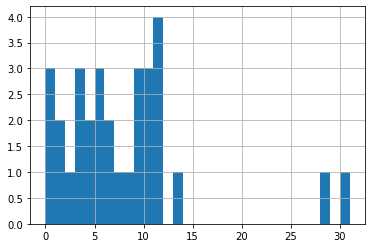

In [21]:
data_live['duration'].hist(bins=31)
data_live['duration'].describe()

Медианное значение продолжительности подержки платформы 6 лет, хотя судя по гистограмме есть платформы, которые не прожили и одного года, а есть такая как ПК, которая все 30+ лет развивалась и оставалась на плаву

In [22]:
array_platform = data['platform'].unique()
array_platform

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [23]:
platform_counts = data['platform'].value_counts()
platform_counts

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Посмотрим топ-5 платформ по количеству игр и продажам

In [24]:
data_count = data.pivot_table(index='platform', values='all_sales', aggfunc=['count', 'sum'])
data_count.columns = ['count', 'sum']
data_count = data_count.sort_values(by='count', ascending=False)
data_count

,count,sum
platform,,
PS2,2127,1233.56
DS,2121,802.78
PS3,1305,931.33
Wii,1286,891.18
X360,1232,961.24
PSP,1193,289.53
PS,1190,727.58
PC,957,255.76
GBA,811,312.88


PS2, DS, PS3, Wii, X360 - платформы с наибольшим количеством игр

In [25]:
data_count = data_count.sort_values(by='sum', ascending=False)
data_count

,count,sum
platform,,
PS2,2127,1233.56
X360,1232,961.24
PS3,1305,931.33
Wii,1286,891.18
DS,2121,802.78
PS,1190,727.58
PS4,392,314.14
GBA,811,312.88
PSP,1193,289.53


Те же самые платформы имеют наилучшие продажи за все время

In [27]:
# создадим дф с этими 5 топовыми платформами
platf = data.groupby('platform').agg({'all_sales': 'sum'}).sort_values(by='all_sales', ascending=False).head(5).index.to_list()
data_top_5 = data[data['platform'].isin(platf)]
data_top_5 = data_top_5.reset_index(drop=True)
data_top_5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
8066,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
8067,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,<NA>,NaN,E,0.01
8068,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,<NA>,NaN,NaN,0.00
8069,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [28]:
# сгруппируем данные по годам для каждой платформы
data_top_sales = data_top_5.groupby(['year_of_release', 'platform'])['all_sales'].sum().unstack()
data_top_sales

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


Text(0, 0.5, 'Доход платформы')

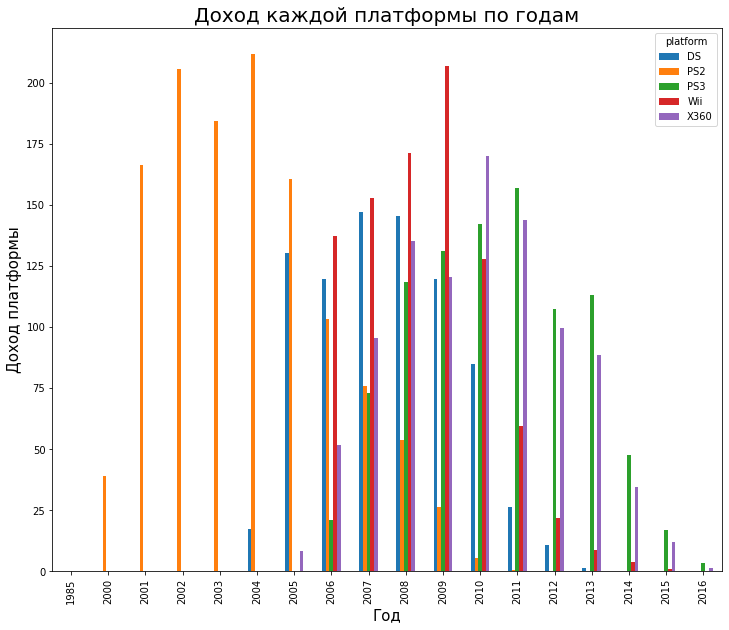

In [29]:
# построим график дохода каждой платформы по годам
ax = data_top_sales.plot.bar(figsize=(12, 10))
ax.set_title('Доход каждой платформы по годам', fontsize=20)
ax.set_xlabel('Год', fontsize=15)
ax.set_ylabel('Доход платформы', fontsize=15)

Удалим выбившееся значение DS в 1985 году

In [30]:
data = data[~((data['platform']=='DS') & (data['year_of_release'] == 1985))]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


Text(0, 0.5, 'Доход платформы')

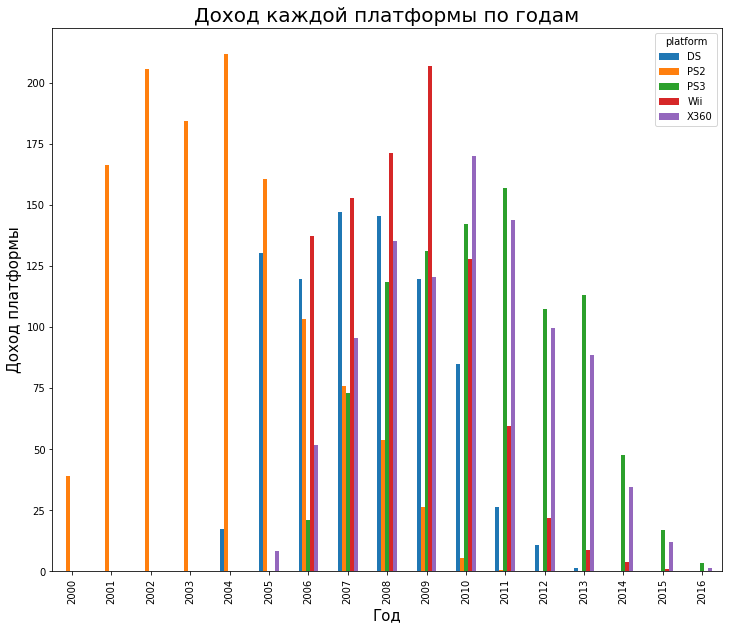

In [31]:
data_top_sales = data[data['platform'].isin(platf)].groupby(['year_of_release', 'platform'])['all_sales'].sum().unstack()
ax = data_top_sales.plot.bar(figsize=(12, 10))
ax.set_title('Доход каждой платформы по годам', fontsize=20)
ax.set_xlabel('Год', fontsize=15)
ax.set_ylabel('Доход платформы', fontsize=15)

Про срок жизни топовых платформ: 
- PS2 прожил <I>11 лет</I>
- DS <I>9 лет</I> 
- Wii скорее всего доживает свой последний год, тоже <I>10 лет</I> будет
- Xbox360 <I>11 лет</I> живет, но тоже продажи падают
- PS3 <I>10 лет</I>

Соответственно в среднем топовые платформы живут <b><I>около 10 лет</b></I>.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

В 2013 году вышли новые поколения самых топовых на данный момент приставок, поэтому возьмем отсчет с 2013

In [32]:
data_actual = data.query('year_of_release >= 2013')
data_actual = data_actual.reset_index(drop=True)
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [33]:
data_actual_year = data_actual.groupby(by = ['year_of_release', 'platform'])['all_sales'].sum().unstack()
data_actual_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Text(0, 0.5, 'Доход платформы')

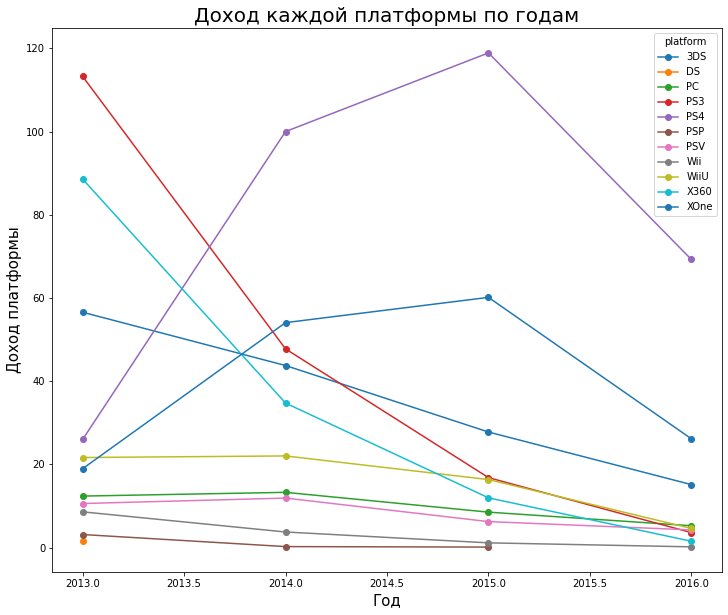

In [34]:
ax = data_actual_year.plot(figsize=(12,10), marker='o')
ax.set_title('Доход каждой платформы по годам', fontsize=20)
ax.set_xlabel('Год', fontsize=15)
ax.set_ylabel('Доход платформы', fontsize=15)

По графику видно, что в 2016 все платформы имеют тенденцию на снижение продаж. Если до этого года XboxOne и PS4 имели положительную тенденцию роста продаж из-за своей новизны, то теперь они уменьшили продажи почти в 2 раза, однако данные платформы все равно остаются лидерами продаж с большим отрывом от конкурентов. Вполне возможно, что такие крупные игроки ввели систему подписок, которая подстегнула продажи отдельных игр к падению. С точки зрения дохода, самыми лучшими будут эти 2 компании, также 3DS имеет показатели лучше, чем оставшиеся компании.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 2.5)

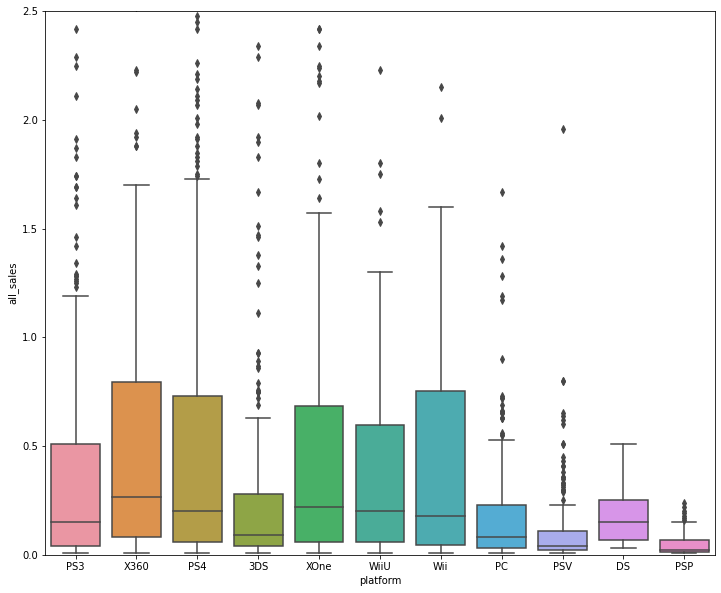

In [35]:
ax = plt.subplots(figsize=(12, 10))
sns.boxplot(data = data_actual, x='platform', y='all_sales')
plt.ylim(0, 2.5)

In [36]:
data_actual.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


- Больше всего игр выпускается на PS3, Ps4, PSV, 3DS (более 300 штук на каждую), далее идут Xbox360, XOne и PC
- Средний доход с игры наибольший у нового поколения приставок PS4 и XOne, а также Xbox 360 (0.8, 0.64 и 0.73 соответственно)
- Медианное значение также наибоольшее у этих приставок (0.265 у X360, 0.22 у XOne, 0.2 у PS4)
- Есть также серия Wii, и хотя прибыль с одной игры не сильно меньше, чем у лидеров, но из-за количества этих игр суммарная выручка очень мала
- Если сравнивать "удачность" выхода новых платформ у Xbox и PS, то можно заметить, что средняя цена игры на PS4 превзошла предыдущее поколение, а на серии Xbox такого не произошло, т.е. у данной компании происходит падение дохода с новым поколением приставок

- о выбросах можно сказать, что чем больше выбросов, тем чаще выстреливают отдельные игры, у PS4 очень много таких нашумевших игр, также у PS3, чего нельзя сказать о PSP и PSV 

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [37]:
# Создадим функцию для построения графика продаж от оценок (левый график это критики, правый - пользователи)
def graph(plat):
    data_plat_critic = data_actual[(data_actual['platform'] == plat) & (data_actual['critic_score'] > 0)]
    data_plat_user = data_actual[(data_actual['platform'] == plat) & (data_actual['user_score'] > 0)]
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 12))
    data_plat_critic.plot(kind='scatter', ax=axs[0], x='critic_score', y='all_sales')
    axs[0].set_title(plat, fontsize=15)
    axs[0].set_ylabel('Общие продажи', fontsize=12)
    axs[0].set_xlabel('Оценки критиков', fontsize=12)
    
    data_plat_user.plot(kind='scatter', ax=axs[1], x='user_score', y='all_sales')
    axs[1].set_title(plat, fontsize=15)
    axs[1].set_ylabel('Общие продажи', fontsize=12)
    axs[1].set_xlabel('Оценки пользователей', fontsize=12)

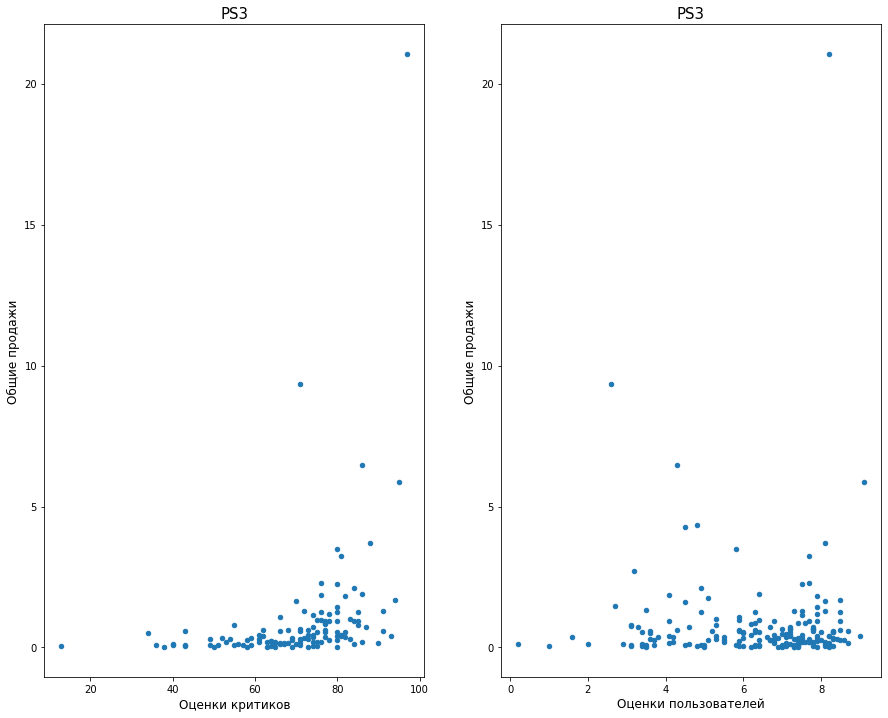

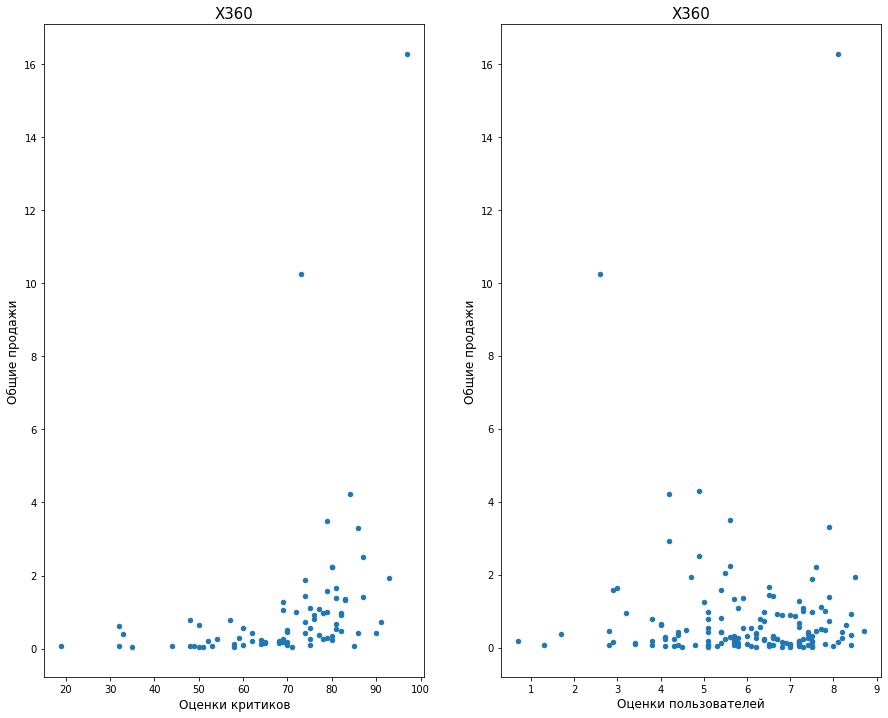

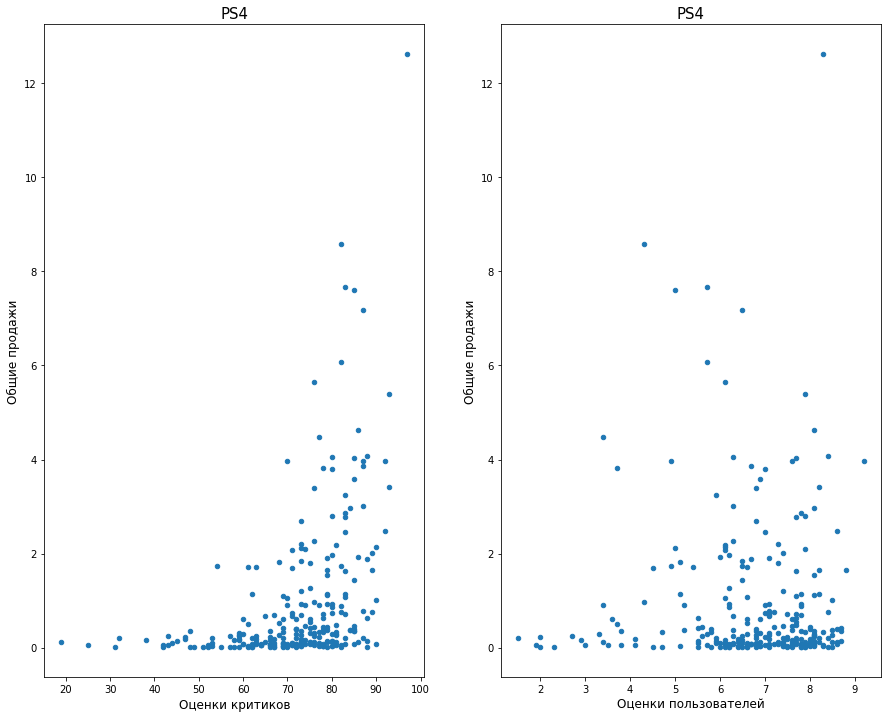

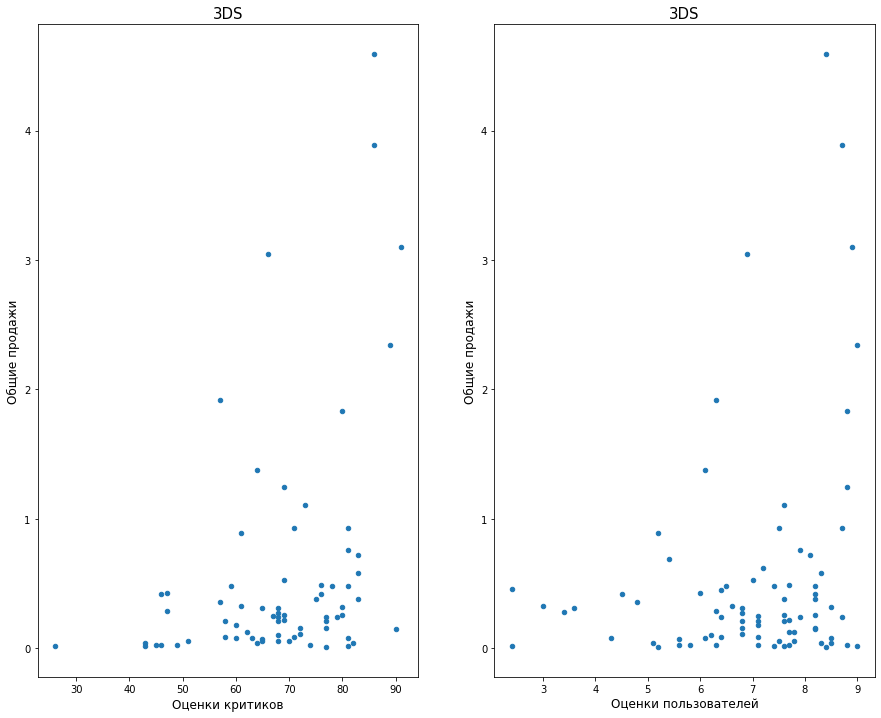

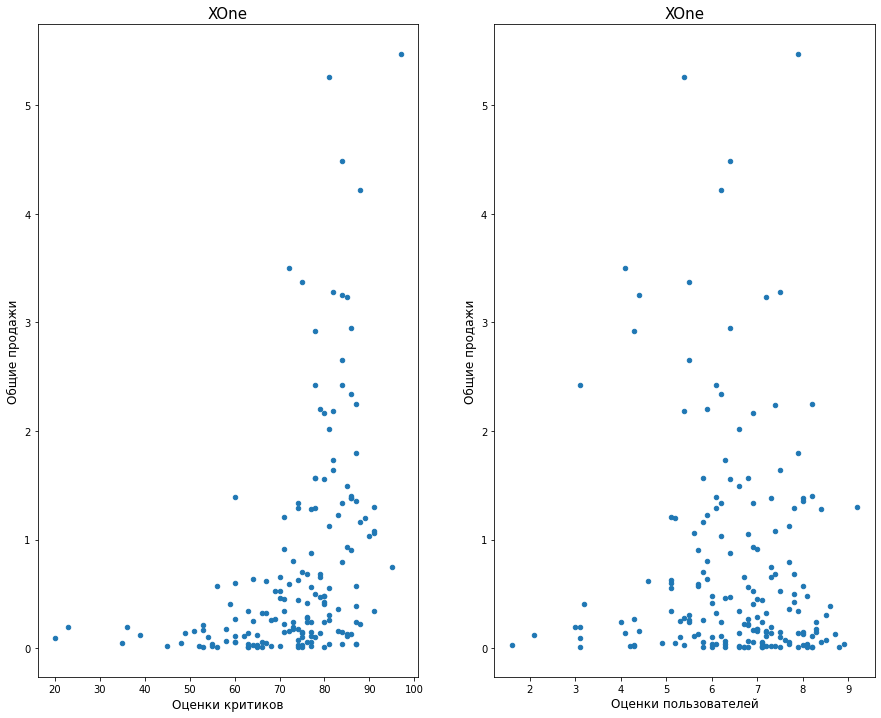

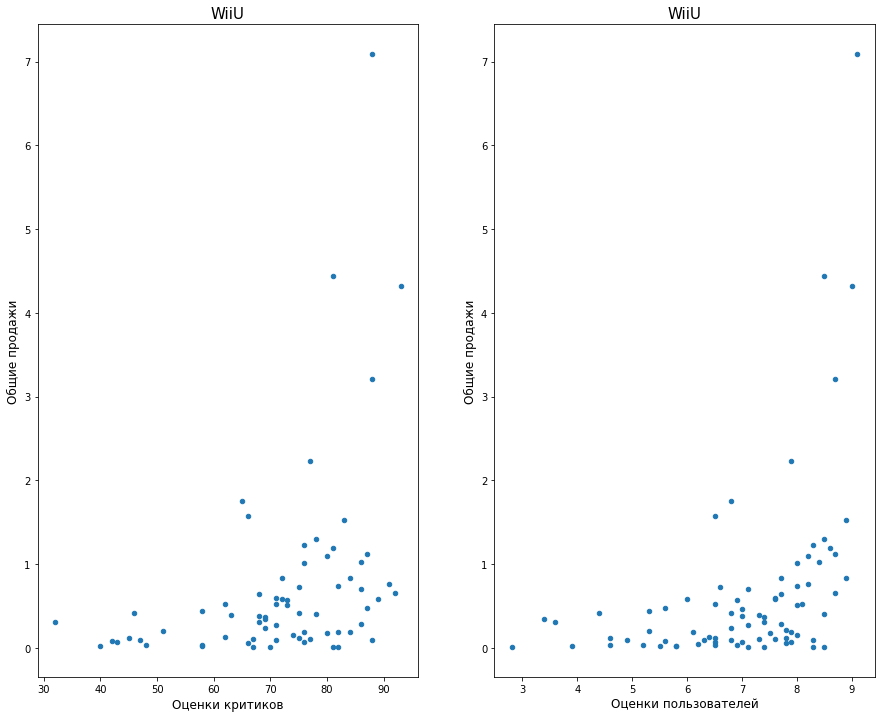

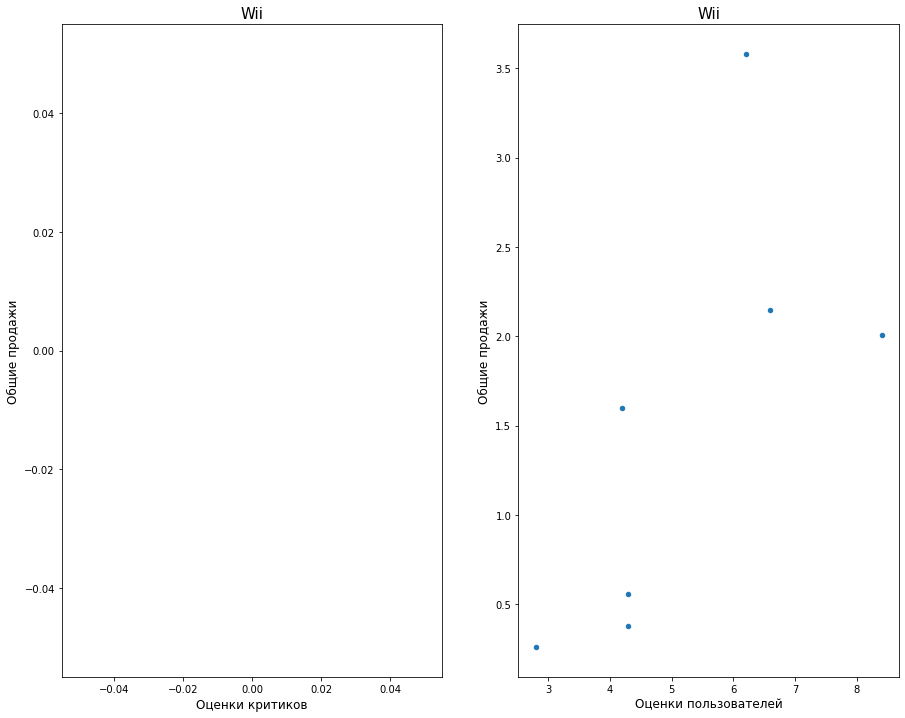

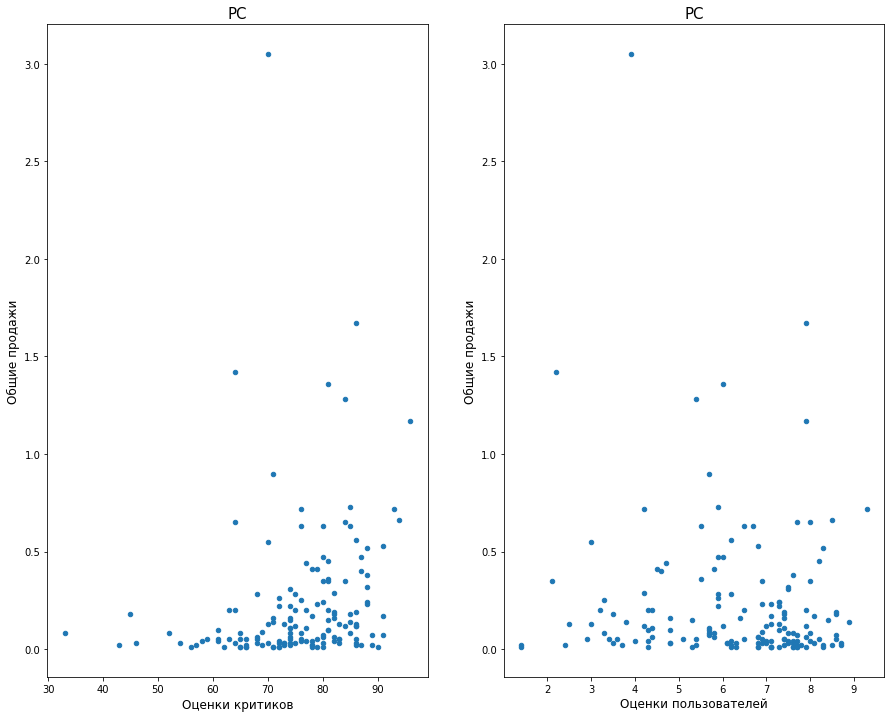

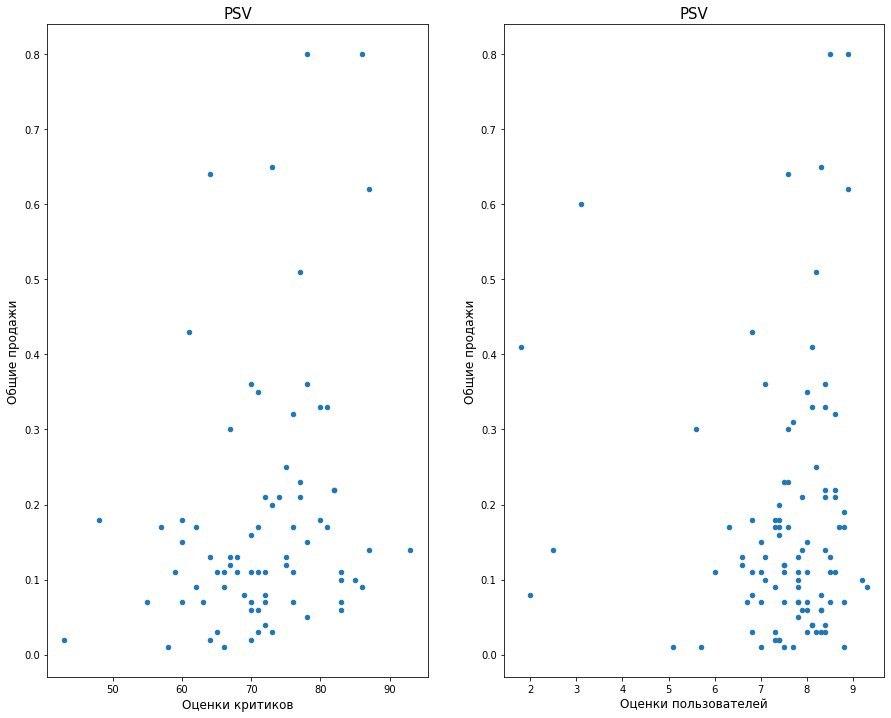

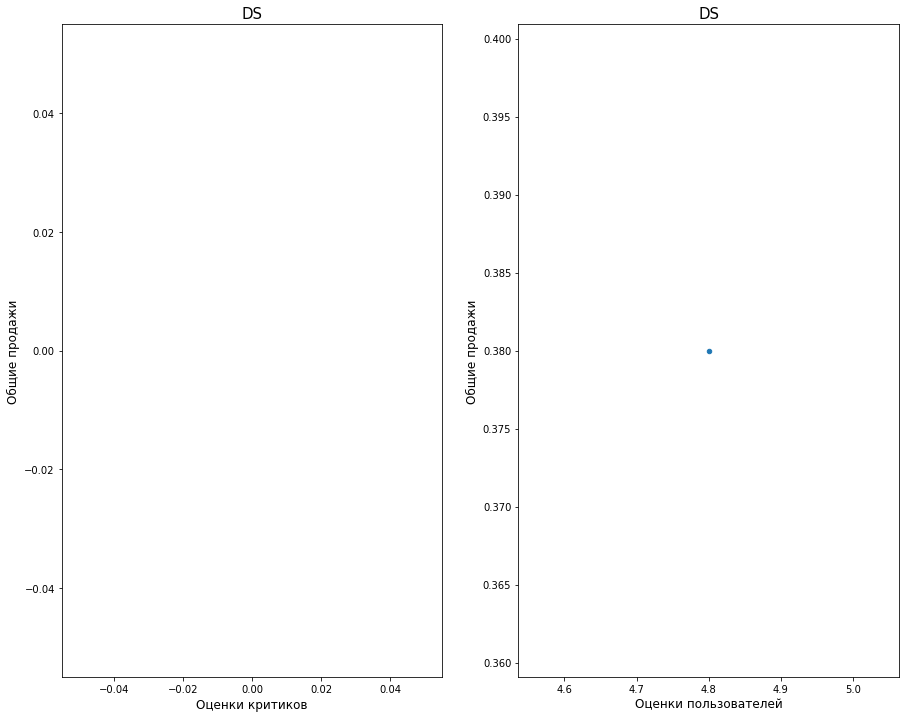

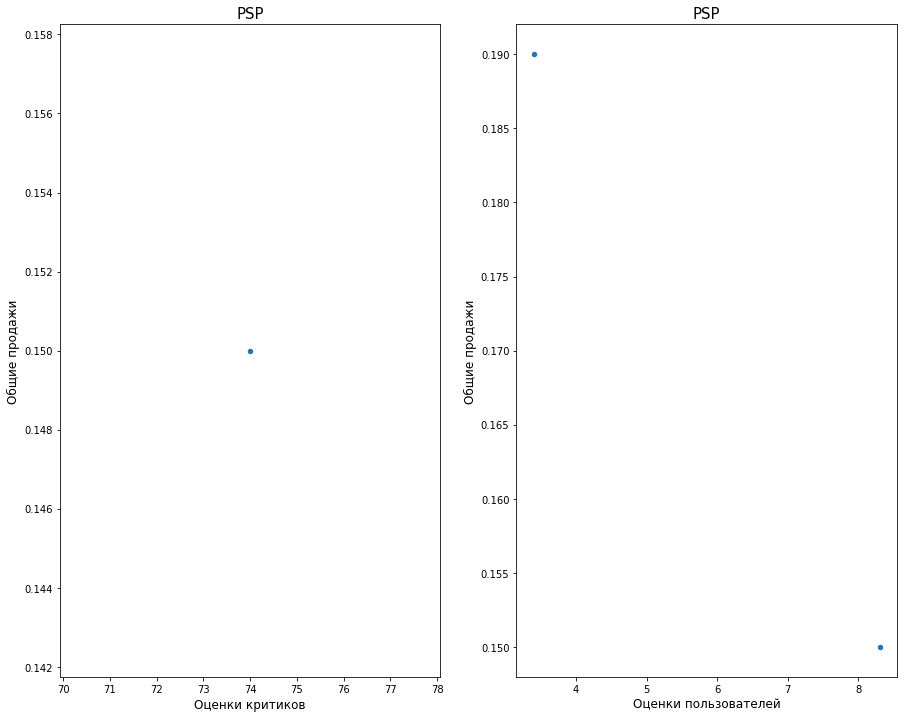

In [38]:
for plat in data_actual['platform'].unique():
    graph(plat)

In [39]:
# методом проб и ошибок пришел к выводу, что надо привести столбец critic_score к типу float
data_actual['critic_score'] = data_actual['critic_score'].astype('float')
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  all_sales        2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 211.6+ KB


In [40]:
def correlation(plat):
    data_plat_critic = data_actual[(data_actual['platform'] == plat) & (data_actual['critic_score'] > 0)]
    data_plat_user = data_actual[(data_actual['platform'] == plat) & (data_actual['user_score'] > 0)]
    
    print(plat)
    print(f'Корреляция между продажами и оценками критиков в {plat}:', 
          data_plat_critic['critic_score'].corr(data_plat_critic['all_sales']))
    print(f'Корреляция между продажами и оценками игроков в {plat}:', 
          data_plat_user['user_score'].corr(data_plat_user['all_sales']))

In [41]:
for plat in data_actual['platform'].unique():
    correlation(plat)

PS3
Корреляция между продажами и оценками критиков в PS3: 0.3342853393371919
Корреляция между продажами и оценками игроков в PS3: 0.0023944027357566925
X360
Корреляция между продажами и оценками критиков в X360: 0.3503445460228664
Корреляция между продажами и оценками игроков в X360: -0.011742185147181342
PS4
Корреляция между продажами и оценками критиков в PS4: 0.40656790206178095
Корреляция между продажами и оценками игроков в PS4: -0.031957110204556376
3DS
Корреляция между продажами и оценками критиков в 3DS: 0.3570566142288103
Корреляция между продажами и оценками игроков в 3DS: 0.24150411773563016
XOne
Корреляция между продажами и оценками критиков в XOne: 0.4169983280084017
Корреляция между продажами и оценками игроков в XOne: -0.06892505328279414
WiiU
Корреляция между продажами и оценками критиков в WiiU: 0.3764149065423912
Корреляция между продажами и оценками игроков в WiiU: 0.4193304819266187
Wii
Корреляция между продажами и оценками критиков в Wii: nan
Корреляция между прода

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Подведем итог по оценкам и продажам:
- У PSP, DS и Wii очень мало оценок и рассматривать их не имеет смысла
- Корреляция между оценками игроков и и продажами около нулевая для большинства платформ, исключение 3DS и WiiU, причиной их такого аномального поведения является то что ни одна плохая игра не продалась большим тиражом и много денег собирали исключительно игры с неужасными оценками
- Корреляция между оценками критиков и продажами сильно выше, но все равно едва переваливают за планку средняя корреляция (максимум 0.41 у XOne, минимум у PC - 0.2) 
- Если сравнивать кто объективней, то явно критики лучше разбираются в играх

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Возьмем актуальные данные и сгруппируем их по жанру

In [42]:
data_genre = data_actual.pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'median'])
data_genre.columns=['count', 'sum', 'median']
data_genre

,count,sum,median
genre,,,
Action,766,321.87,0.110
Adventure,245,23.64,0.030
Fighting,80,35.31,0.125
Misc,155,62.82,0.100
Platform,74,42.63,0.225
Puzzle,17,3.17,0.060
Racing,85,39.89,0.120
Role-Playing,292,145.89,0.125
Shooter,187,232.98,0.450


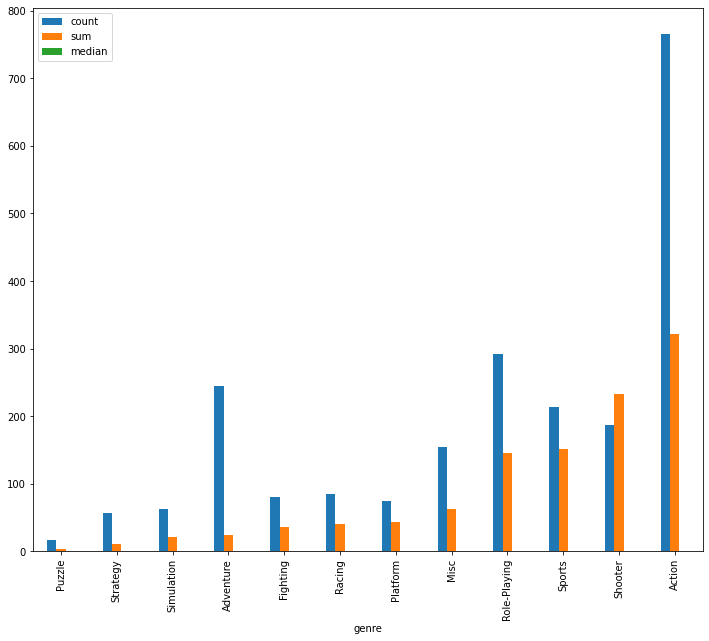

In [43]:
# построим столбчатую диаграмму с количеством игр и суммарной продажей
data_genre = data_genre.sort_values(by='sum')
ax = data_genre.plot.bar(figsize=(12, 10))

In [44]:
# посмотрим у кого наибольшее медианное значение продажи
data_genre = data_genre.sort_values(by='median', ascending=False)
data_genre

,count,sum,median
genre,,,
Shooter,187,232.98,0.450
Sports,214,150.65,0.240
Platform,74,42.63,0.225
Role-Playing,292,145.89,0.125
Fighting,80,35.31,0.125
Racing,85,39.89,0.120
Action,766,321.87,0.110
Simulation,62,21.76,0.100
Misc,155,62.82,0.100


- Наибольшее число игр в жанрах: 
    - Action (766 игр)
    - Role-Playing (292 игры)
    - Sports (214 игры)
    - Shooter (187 игры)
    - Adventure (245 игр)
- Наибольшее количество денег собрали жанры: 
    - Action (321.87 млн)
    - Role-Playing (145.89 млн)
    - Sports (150.65 млн)
    - Shooter (232.98 млн)
    - Misc (62.82 млн)
- Если смотреть с точки зрения сколько заработает игра после выхода, то самые прибыльные жанры это: Shooter (0.45 млн), Sports (0.24 млн), Platform (0.225 млн), остальные жанры отстают почти в 2 раза
- Один из самых популярных жанров Adventure является тем жанром, куда лучше не лезть с точки зрения бизнеса


## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [45]:
# сгруппируем данные по платформе
data_region = data_actual.groupby('platform').sum()
data_region

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
platform,,,,,,,,
3DS,610329,38.20,30.96,67.81,6.28,4852.0,558.1,143.25
DS,16104,0.57,0.85,0.00,0.12,0.0,4.8,1.54
PC,380766,11.11,25.36,0.00,2.96,11257.0,971.8,39.43
PS3,694853,63.50,67.81,23.35,26.77,8494.0,1180.8,181.43
PS4,789937,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14
PSP,134887,0.00,0.17,3.29,0.04,74.0,11.7,3.50
PSV,721229,5.04,6.10,18.59,3.26,5516.0,745.2,32.99
Wii,46316,6.56,5.93,0.05,1.12,0.0,36.8,13.66
WiiU,231624,29.21,19.85,10.88,4.69,5015.0,561.4,64.63


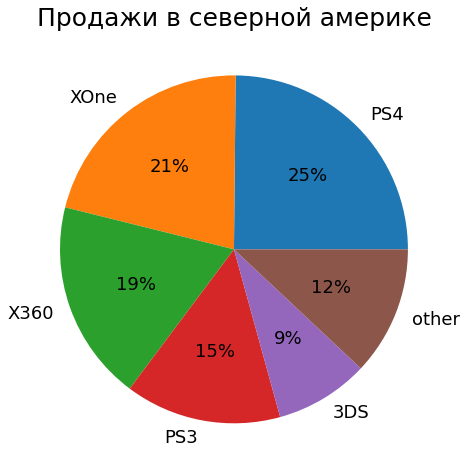

In [46]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона NA
data_na_top = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
data_na_other = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
data_na = data_na_top.append(pd.Series(data_na_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в северной америке', fontsize=25)
ax = data_na.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

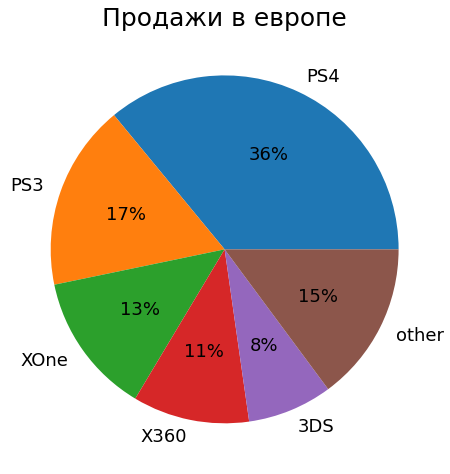

In [47]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона EU
data_eu_top = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
data_eu_other = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
data_eu = data_eu_top.append(pd.Series(data_eu_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в европе', fontsize=25)
ax = data_eu.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

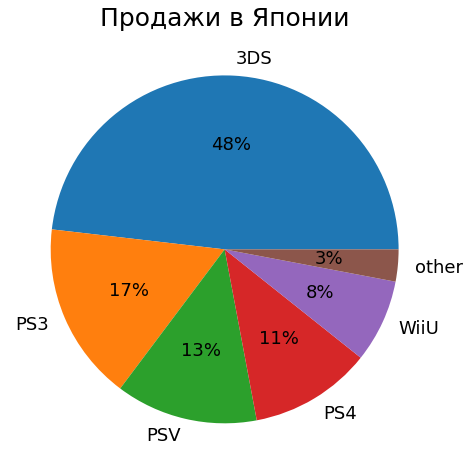

In [48]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона JP
data_jp_top = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]
data_jp_other = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()
data_jp = data_jp_top.append(pd.Series(data_jp_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в Японии', fontsize=25)
ax = data_jp.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

Топ 5 в:
- NA 
    - PS4 - 25%
    - XOne - 21%
    - X360 - 19%
    - PS3 - 15%
    - 3DS - 9%
- EU 
    - PS4 - 36%
    - PS3 - 17%
    - XOne - 13%
    - X360 - 11%
    - 3DS - 8%
- JP 
    - 3DS - 48%
    - PS3 - 17%
    - PSV - 13%
    - PS4 - 11%
    - WIIU - 8%
- В американском регионе более равномерно распределены продажи по платформам. Ранее отмеченный факт, что новое поколение PS вышел более удачным, чем у XOne также находит здесь подтверждение
- Люди в европе и америке предпочитают играть на крупных консолях, требующих подключения к телевизору (80% продаж в данных регионах это игры PS и Xbox) 
- В Японии люди предпочитают играть на местных производителях, практически половину заняла компания Nintendo с 3DS, 41% компания Sony с платформами PS3, PSV и PS4. При этом 3DS и PSV являются автономными устройствами, т.е. люди предпочитают иметь возможность в любой момент начать играть. Также продажи PS4 оказались неуспешными в Японии, т.к. они не смогли вытеснить более старую модель 

### Самые популярные жанры (топ-5). Поясните разницу.

In [49]:
data_region_genre = data_actual.groupby('genre').sum()
data_region_genre

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
genre,,,,,,,,
Action,1543186,126.05,118.13,40.49,37.20,22365.0,2659.8,321.87
Adventure,493536,7.14,8.25,5.82,2.43,3414.0,447.7,23.64
Fighting,161153,15.55,8.55,7.65,3.56,2923.0,337.8,35.31
Misc,312231,27.49,20.04,9.20,6.09,3151.0,362.7,62.82
Platform,149043,18.14,15.58,4.79,4.12,3765.0,389.4,42.63
Puzzle,34243,0.83,1.00,1.18,0.16,529.0,52.3,3.17
Racing,171240,12.96,20.19,2.30,4.44,4345.0,395.2,39.89
Role-Playing,588203,46.40,36.97,51.04,11.48,9331.0,1003.2,145.89
Shooter,376687,109.74,87.86,6.61,28.77,9771.0,989.4,232.98


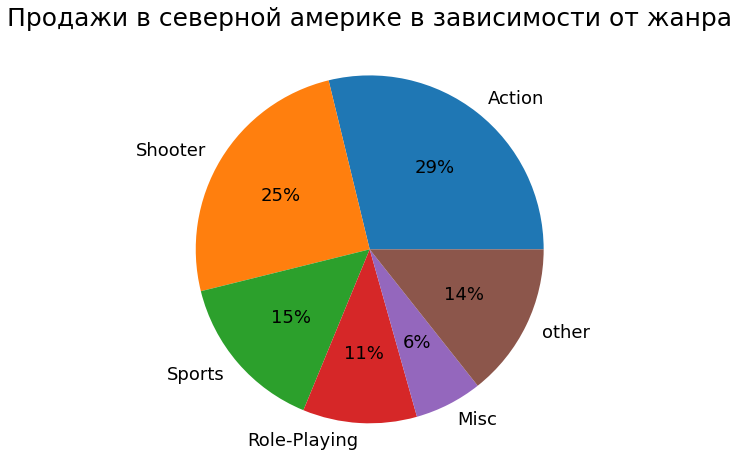

In [50]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона NA
data_na_top = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
data_na_other = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
data_na = data_na_top.append(pd.Series(data_na_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в северной америке в зависимости от жанра', fontsize=25)
ax = data_na.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

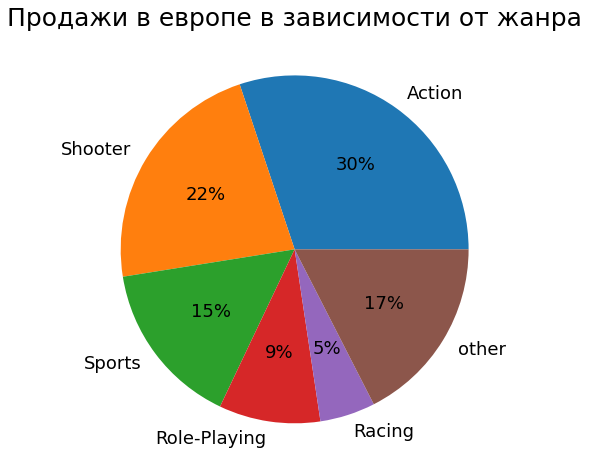

In [51]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона EU
data_na_top = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
data_na_other = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
data_na = data_na_top.append(pd.Series(data_na_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в европе в зависимости от жанра', fontsize=25)
ax = data_na.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

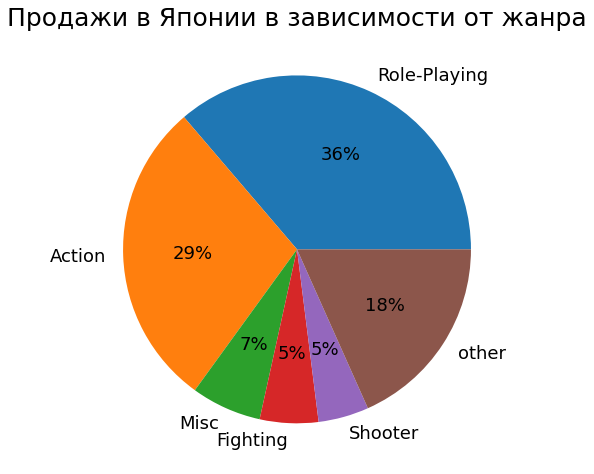

In [52]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона JP
data_na_top = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]
data_na_other = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()
data_na = data_na_top.append(pd.Series(data_na_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в Японии в зависимости от жанра', fontsize=25)
ax = data_na.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

Топ 5 в:
- NA 
    - Action - 29% 
    - Shooter - 25% 
    - Sports - 15% 
    - Role-playing - 11% 
    - Misc - 6%
- EU 
    - Action - 30% 
    - Shooter - 22% 
    - Sports - 15% 
    - Role-playing - 9% 
    - Racing - 5%
- JP 
    - Role-playing - 36% 
    - Action - 29% 
    - Misc - 7% 
    - Fighting - 5%
    - Shooter - 5%)
- Снова видим схожесть рынков Европы и Северной Америки
- Одинаковый процент занимает жанр Action во всех рынках
- Западные люди предпочитают Shooter, в то время как в Японии Role-Playing, причем 2 самых популярных жанра в Японии занимают 65% рынка
- Причина популярности жанра Role-Playing в Японии может быть заложена в культуре самих японцев, их любви к косплеям и ролевым играм в жизни

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [53]:
data_actual['rating'] = data_actual['rating'].fillna('неизвестно')
data_region_rating = data_actual.groupby('rating').sum()
data_region_rating

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
rating,,,,,,,,
E,608364,79.05,83.36,15.14,22.61,14339.0,1533.8,200.16
E10+,507612,54.24,42.69,5.89,12.57,12212.0,1410.7,115.39
M,743289,165.21,145.32,14.11,47.04,23583.0,2427.8,371.68
T,670878,49.79,41.95,20.59,14.29,18758.0,2175.2,126.62
неизвестно,1968185,89.42,78.91,85.05,23.46,2483.0,301.3,276.84


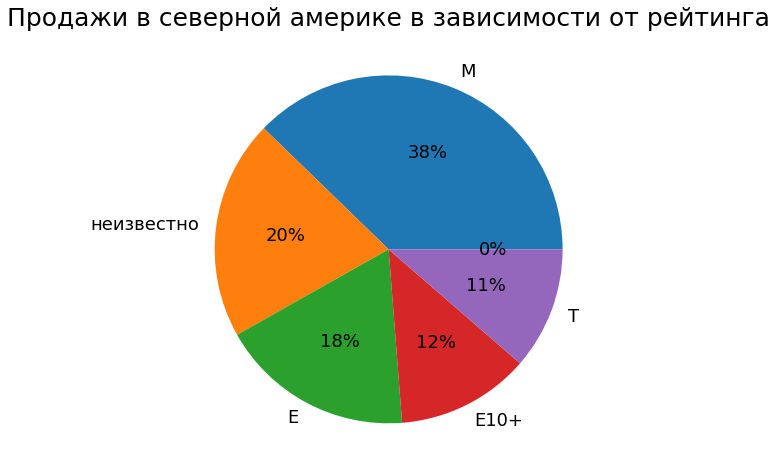

In [54]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона NA
data_na_top = data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)[:5]
data_na_other = data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)[5:].sum()
data_na = data_na_top.append(pd.Series(data_na_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в северной америке в зависимости от рейтинга', fontsize=25)
ax = data_na.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

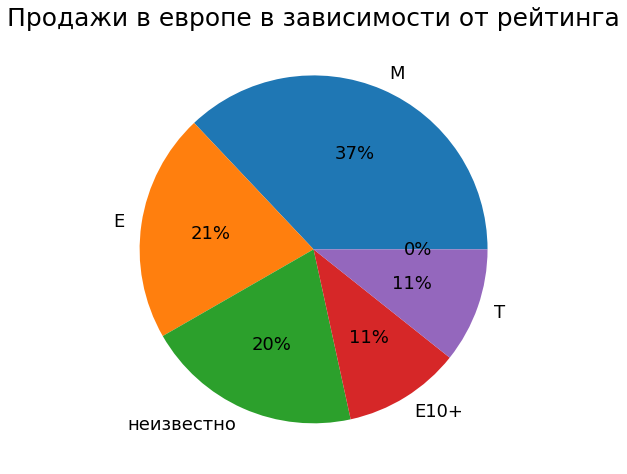

In [55]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона EU
data_na_top = data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)[:5]
data_na_other = data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)[5:].sum()
data_na = data_na_top.append(pd.Series(data_na_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в европе в зависимости от рейтинга', fontsize=25)
ax = data_na.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

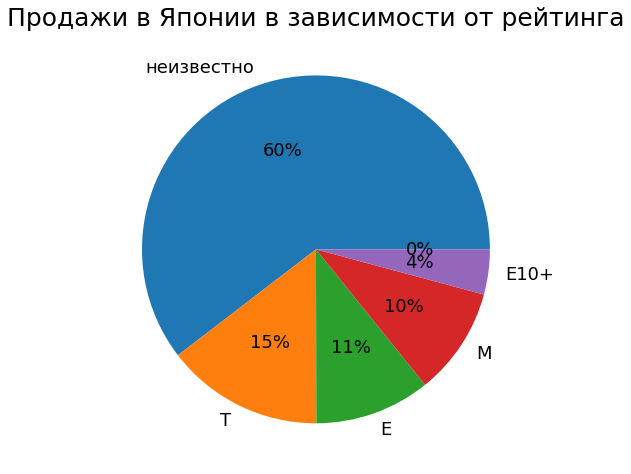

In [56]:
# объеденим сначала малые компании, затем построим круговую диаграмму для региона JP
data_na_top = data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)[:5]
data_na_other = data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)[5:].sum()
data_na = data_na_top.append(pd.Series(data_na_other, index=['other']))


fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Продажи в Японии в зависимости от рейтинга', fontsize=25)
ax = data_na.plot.pie(autopct='%1.0f%%', fontsize=18)

ax.set_ylabel("")
plt.show()

- Снова получаем, что рынки Америки и Европы очень похожи, 38% игр имеет рейтинг M (для взрослых), затем игры без рейтинга и игры для всех занимают примерно одинаковые доли рынка, затем E10+ (кому больше 10 лет), затем для подростков T
- В Японии большинство игр не имеют возрастного рейтинга. Возожно у них свои цензоры, которые раставляют ограничение

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги не равны

In [57]:
data_XOne = data_actual[data_actual['platform'] == 'XOne']['user_score'].dropna()
data_PC = data_actual[data_actual['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_PC, data_XOne, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Т.к. ttest_ind сравнения двух совокупностей проверяет на их равество, то формулируем гипотезы так:

Нулевая гипотеза: пользовательские рейтинги жанров Action и Sports равны

Альтернативная гипотеза: пользовательские рейтинги жаноров Action и Sports не равны

In [58]:
data_Action = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
data_Sports = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_Action, data_Sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Итого:
- гипотеза о том, что средние пользовательские оценки XOne и PC равны имеет место быть и ее нельзя отвергнуть (p-value 0.148)
- гипотеза о равенстве рейтингов жанров Action и Sports не выдержала проверки (p-value 1е-20), соответственно скорее всего пользовательские рейтнги жанров не равны

При составление ttest сравнивали 2 генеральные совокупноси на равенство средних, equal_var = False т.к. размеры имеют разное значение

## Вывод

Была проведена работа по изучению истории продаж игр, в работе было сделано:
- изучена база данных
- изменены названия столбцов, обаботаны дубликаты, пропуски, изменены типы столбцов
- подсчитан доход по каждой игре
- построен график выпуска игр по годам
    - в 1994 году началось резкое возрастание количества игр, максимальное производство в 2008-2009 годах (1427 игр в год), потом произошел спад производства игр (в 2016 году 503 игры)
    - доход от игр также максимален был в 2008 году, после этого аналогичный спад (671 в 2008 против 129 млн в 2016)
- топовые платформы живут около 10 лет
- в современных реалиях наиболее крупные доходы у платформ XOne, PS4 и 3DS
- наибольшее медианное значение дохода игр: 0.265 - X360, 0.22 - XOne, 0.2 - PS4
- если смотреть с точки зрения сколько заработает игра после выхода, то самые прибыльные жанры это: Shooter (0.45 млн), Sports (0.24 млн), Platform (0.225 млн)
- влияние критиков имеет значение на продвжи игр (коэффициент корреляции 0.3-0.4), в свою очередь оценки пользователей не имеют никакого значения
- рынки северной америки и европы крайне похожи, япония сильно отличается от них
- распределение платформ по продажам:
    - NA: 
        - PS4 - 25%
        - XOne - 21%
        - X360 - 19%
        - PS3 - 15%
        - 3DS - 9%
    - EU 
        - PS4 - 36%
        - PS3 - 17%
        - XOne - 13%
        - X360 - 11%
        - 3DS - 8%
    - JP 
        - 3DS - 48%
        - PS3 - 17%
        - PSV - 13%
        - PS4 - 11%
        - WIIU - 8%

- Люди в европе и америке предпочитают играть на крупных консолях, требующих подключения к телевизору (80% продаж в данных регионах это игры PS и Xbox) 
- В Японии люди предпочитают играть на местных производителях, практически половину заняла компания Nintendo с 3DS, 41% компания Sony с платформами PS3, PSV и PS4. При этом 3DS и PSV являются автономными устройствами, т.е. люди предпочитают иметь возможность в любой момент начать играть. Также продажи PS4 оказались неуспешными в Японии, т.к. они не смогли вытеснить более старую модель 

- распредение продаж по жанрам: 
    - NA 
        - Action - 29% 
        - Shooter - 25% 
        - Sports - 15% 
        - Role-playing - 11% 
        - Misc - 6%
    - EU 
        - Action - 30% 
        - Shooter - 22% 
        - Sports - 15% 
        - Role-playing - 9% 
        - Racing - 5%
    - JP 
        - Role-playing - 36% 
        - Action - 29% 
        - Misc - 7% 
        - Fighting - 5%
        - Shooter - 5%
- Западные люди предпочитают Shooter, в то время как в Японии Role-Playing, причем 2 самых популярных жанра в Японии занимают 65% рынка
- Причина популярности жанра Role-Playing в Японии может быть заложена в культуре самих японцев, их любви к косплеям и ролевым играм в жизни
- в Японии преобладают большая часть игр не имеет возрастного рейтинга
- в европе и америке люди предпочитают играть во взрослые игры

-  проверены следующие гипотезы:
    - гипотезу о том, что средние пользовательские оценки XOne и PC равны нельзя отвергнуть (p-value 0.148)
    - гипотеза о равенстве рейтингов жанров Action и Sports слудует отвергнуть (p-value 1е-20), соответственно рейтинги жанров не равны
    
Рекомендация для проведения рекламной кампании: самыми выгодными играми являются игры на платформах XOne и PS4, эти консоли нового поколения, им всего по 3 года; наиболее выгодными являются игры в жанре Shooter, они в 2 раза выгоднее своих конкурентов, помимо этого они занимают 2 место в рейтинге жанров в европе и америке; В Японии дела обстоят иначе, там самый популярный жанр это Role-Playing, причем половину рынка занимает 3DS